In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data)
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
boston_df.columns = boston_data.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


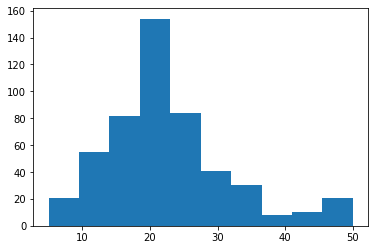

In [6]:
plt.hist(y);

In [7]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

for mean_, std_ in zip(means, stds):
    print(f'mean: {mean_:.2f}, std: {std_:.2f}')

mean: 3.61, std: 8.59
mean: 11.36, std: 23.30
mean: 11.14, std: 6.85
mean: 0.07, std: 0.25
mean: 0.55, std: 0.12
mean: 6.28, std: 0.70
mean: 68.57, std: 28.12
mean: 3.80, std: 2.10
mean: 9.55, std: 8.70
mean: 408.24, std: 168.37
mean: 18.46, std: 2.16
mean: 356.67, std: 91.20
mean: 12.65, std: 7.13


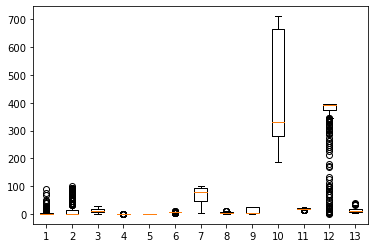

In [8]:
plt.boxplot(X);

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f'{X_train.shape} - {y_train.shape}')
print(f'{X_test.shape} - {y_test.shape}')

(253, 13) - (253,)
(253, 13) - (253,)


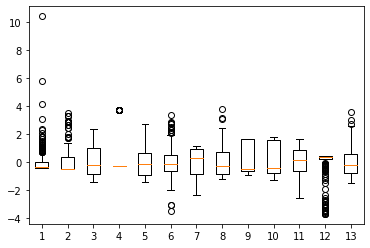

In [10]:
mean_train = np.mean(X_train, 0)
std_train = np.std(X_train, 0)
X_train_norm = (X_train - mean_train) / std_train

plt.boxplot(X_train_norm);

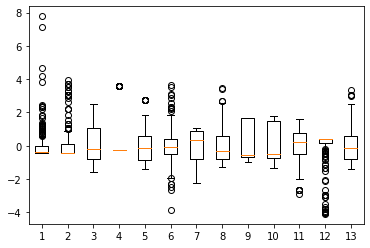

In [11]:
mean_test = np.mean(X_test, 0)
std_test = np.std(X_test, 0)
X_test_norm = (X_test - mean_test) / std_test

plt.boxplot(X_test_norm);

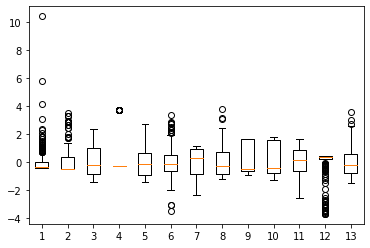

In [12]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

plt.boxplot(X_train_norm);
# plt.boxplot(X_test_norm);

In [13]:
model = Ridge()
print(f'Default lambda: {model.alpha}')
print(model)

Default lambda: 1.0
Ridge()


In [14]:
model.fit(X_train_norm, y_train)
y_predicted_train = model.predict(X_train_norm)
mae_train = np.mean([np.abs(y_train[i] - y_predicted_train[i]) for i in range(len(y_train))])

print(f'MAE on train set: {mae_train:.2f}')

MAE on train set: 3.21


In [15]:
y_predicted_test = model.predict(X_test_norm)
mae_test = np.mean([np.abs(y_test[i] - y_predicted_test[i]) for i in range(len(y_test))])

print(f'MAE on test set: {mae_test:.2f}')

MAE on test set: 3.39


[-0.94906125  0.76584764  0.18813391  1.10903048 -1.52340139  3.2066708
 -0.60482224 -3.08756672  1.64356908 -1.28523236 -1.7940949   1.04717232
 -3.63711199]


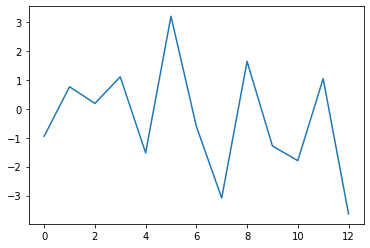

In [16]:
print(model.coef_)
plt.plot(model.coef_);
w1 = model.coef_

In [17]:
model = Ridge(alpha=1000)
model.fit(X_train_norm, y_train)
y_predicted_train = model.predict(X_train_norm)
y_predicted_test = model.predict(X_test_norm)

mae_train = np.mean([np.abs(y_train[i] - y_predicted_train[i]) for i in range(len(y_train))])
mae_test = np.mean([np.abs(y_test[i] - y_predicted_test[i]) for i in range(len(y_test))])

print(f'MAE on train set: {mae_train:.2f}')
print(f'MAE on test set: {mae_test:.2f}')

MAE on train set: 4.87
MAE on test set: 4.53


||w|| when lambda = 1: 6.87
||w|| when lambda = 1000: 1.87


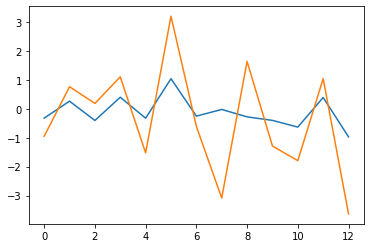

In [18]:
plt.plot(model.coef_);
plt.plot(w1);

print(f'||w|| when lambda = 1: {np.linalg.norm(w1):.2f}')
print(f'||w|| when lambda = 1000: {np.linalg.norm(model.coef_):.2f}')

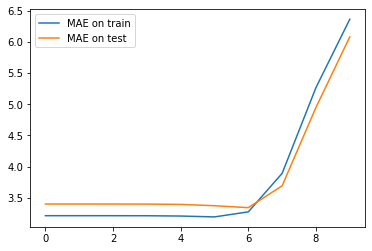

In [19]:
mae_train = []
mae_test = []
coefs = []
alphas = np.logspace(-3, 4, 10)

for alpha_ in alphas:
    model = Ridge(alpha=alpha_)
    model.fit(X_train_norm, y_train)
    y_predicted_train = model.predict(X_train_norm)
    y_predicted_test = model.predict(X_test_norm)

    coefs.append(model.coef_)
    mae_train.append(np.mean([np.abs(y_train[i] - y_predicted_train[i]) for i in range(len(y_train))]))
    mae_test.append(np.mean([np.abs(y_test[i] - y_predicted_test[i]) for i in range(len(y_test))]))
    
plt.plot(mae_train);
plt.plot(mae_test);
plt.legend(['MAE on train', 'MAE on test']);

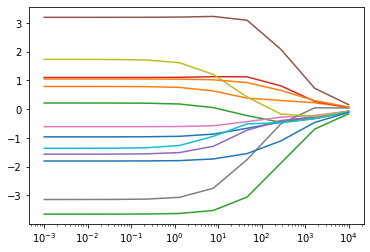

In [20]:
plt.plot(alphas, coefs);
plt.xscale('log')

In [36]:
params = { 'alpha': alphas }
model = Ridge()
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error')
grid.fit(X_train_norm, y_train)

y_predicted_train = grid.predict(X_train_norm)
y_predicted_test = grid.predict(X_test_norm)

mae_train = np.mean([np.abs(y_train[i] - y_predicted_train[i]) for i in range(len(y_train))])
mae_test = np.mean([np.abs(y_test[i] - y_predicted_test[i]) for i in range(len(y_test))])

print(mae_train, mae_test)
print(grid.best_estimator_.alpha)

3.190965561831066 3.3709543331017437
7.742636826811269
